## What is a Classification Problem? 

Neural Network Classification: Predicting things.

Linear Regression: Predicting number.

https://www.learnpytorch.io/02_pytorch_classification/



A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.



### The inputs and outputs of Classification

Inputs:  

- Pictures (pixel values: Width x Height x Color Chanel[R,G,B])
- Shapes: [Batch Size(usually 32), Color Channels, Width, Height] 

Outputs:  
- Predicted value of each categories (proberbilities)
- [Shapes = Option of Classes we have]

## What we're going to cover

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |

## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make Classification data and get it ready

In [212]:
import sklearn

In [213]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [214]:
print(f"First 5 samples of X: {X[:5]},size of X: {X.shape}")
print(f"First 5 samples of y: {y[:5]},size of y: {y.shape} ")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]],size of X: (1000, 2)
First 5 samples of y: [1 1 1 1 0],size of y: (1000,) 


we can see that for X, there are two features, and Y has only 1 output(either 0 or 1)

In [215]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y}) # input a dictionary

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Text(0.5, 0, 'Feature 0')

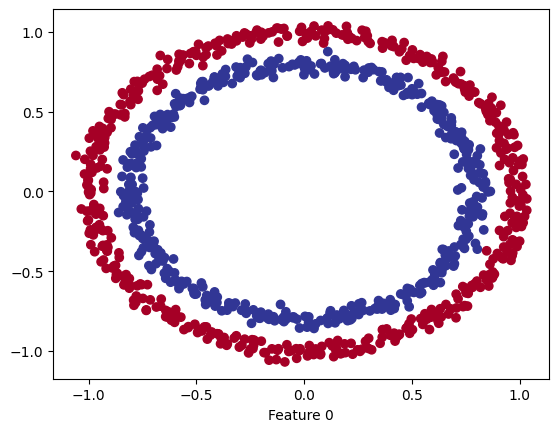

In [216]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0],y = X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 0")

now we can see from the graph that in the classification problem, we are trying to classify a point based on which circles it's in. so given two number(X1,X2) -> Blue Dots or Red Dots


### 1.1 Check input and output shapes

in ML we deal with data in tensor form, and one of the most common errors is the mismatch of input/output shape. Therefore, before doing any muniplation, first check for the input and output shape.

In [217]:
X.shape, y.shape
# notice that the second number of X's shape is 2, meaning there are 2 features.

((1000, 2), (1000,))

In [218]:
#converting to tensors
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
 

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1


### 1.2 Turn data into tensors and create train and test splits

In [219]:


import torch 
torch.__version__ #at least 1.10


'2.9.0+cpu'

In [220]:
#let's check what type of data structures our data are
type(X_sample), type(y_sample)

(numpy.ndarray, numpy.int64)

In [221]:
#they are numpy array. we need to convert them to tensors
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float32)
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float32)


# the default type is double-precision float32,
# but the dafult type of numpy is int64. so we need to convert to float32 to save memory

In [222]:
X[:5], y[:5] # we should now get tensor data type

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [223]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# the 1000 data sets is set to 800 training and 200 test sets.

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 2. Building a model

Let's build a model to classify our blue and red dots. 

To do so, we want to:
1. Setup device agonistic code
2. Construct a model(by subclssing  `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop.

In [225]:
# Set up device- agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [226]:
import torch
from torch import nn

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

# Create an instance of the model and send it to the target device
model_0 = CircleModelV0().to(device)

another way to construct a model is to use pre-built class... this allows faster model building, but of course, subclassing nn.module is more flexible

In [227]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [228]:
model_0.state_dict()
# Five values for bias in layer 1 (5 neurons) and 10 values for weights (2 features * 5 neurons)

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [229]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device)) #make sure X_test is on the same device as model
print(f"Lengh of untrained preds: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\n untrained_preds[:5] : {untrained_preds[:5]}")
print(f"\n y_test[:5] : {y_test[:5]}")

Lengh of untrained preds: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200])

 untrained_preds[:5] : tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

 y_test[:5] : tensor([1., 0., 1., 0., 1.])


### 2.1 Set up losss function and optimizer

Which loss function or optimizer should you use? 

This is problem specific.

For regression: 
loss-function： MAE or MSE (mean absolute error or mean square error)

For classification you might want binary cross entropy or categorical cross entropy(or just entropy)

* as a reminder, the loss function measures how wrong your models predictions are

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these are some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use? 

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. 

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer. 

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [230]:
# Set up the loss function and optimizer
from pickletools import optimize


#loss_fn = nn.BCELoss() #requires inputs to have gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() #for binary classification = sigmoid + binary cross entropy loss

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [231]:
# Lets calculate the accuracy of our untrained model
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc  

#accuracy_fn(y_true=y_test.to(device), y_pred=torch.round(torch.sigmoid(untrained_preds)))

## 3 Train the model

Here are the steps for training...

1. Forward Pass
2. Calculate the loss
3. Zero gradients
4. Perform Backpropagation on the loss - computes the gradient of the loss with respect for every model paramterr to be updated. This is known as backpropagation

5. Step the optimizer(gradient descent) - update the parameters with respect to the loss gradients in order to improve them. 

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation funct (e.g. sigmoid for binary and softmax for multiclass classification)

Then we can convert our model's prediction probabiliteis to ** prediction labels** by either rounding them or taking the argmax()

In [232]:
# View the first 5 outputs of the forward pass on the test data 
model_0.eval() # set the model to evaluation mode
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
    # without passing in any activation function, just passing through the layers...
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [233]:
y_test[:5] #to compare with y_logits

tensor([1., 0., 1., 0., 1.])

In [234]:
# Use the sigmoid activation function on our model logits into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits) 
# output how likely the model thinks the output is class 1
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform a range-style round on them
* if `y_pred_probs` >= 0.5 -> y = 1
* otherwise y = 0

this rule can be adjusted to see how stick(certain) you want to be

In [235]:
# Now we can pass these to the round function. 
y_preds = torch.round(y_pred_probs)

# In full， in line  (logis-> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### 3.2 Building a training and testing loop for our model.

In [236]:
torch.manual_seed(42) 
# there is also a cuda seed ..
torch.cuda.manual_seed(42) # doing operation on cuda device

epochs = 100 

#put data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# Building training and evaluation loop

for epochs in range(epochs):
    ### Training 
    model_0.train() 
    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred
    
    # Calculate the loss/accurancy, loss_fn is BCEWithLogitsLoss
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss Expect raw logits
                   y_train)
    # if the lossfu was BECLoss, expects prediction prebabilites as input
    #loss = loss_fn(torch.sigmoid(y_logits),y_train)

    acc = accuracy_fn(y_true=y_train,y_pred=y_pred) # accuracy function
    
    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backward
    loss.backward()

    #5. Optimizer step
    optimizer.step() # gradient descent 

    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        #1. Forwar pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        #print out what's happening
    if epochs % 10 == 0:
        print(f"Epoch:{epochs} | Loss : {loss:.5f}, Acc:{acc:.2f}% | Test Loss: {test_loss:.5f} Test acc :{test_acc:.5f}")


Epoch:0 | Loss : 0.69796, Acc:51.88% | Test Loss: 0.69440 Test acc :58.00000
Epoch:10 | Loss : 0.69590, Acc:51.25% | Test Loss: 0.69305 Test acc :53.00000
Epoch:20 | Loss : 0.69490, Acc:51.62% | Test Loss: 0.69254 Test acc :49.50000
Epoch:30 | Loss : 0.69435, Acc:51.12% | Test Loss: 0.69236 Test acc :49.50000
Epoch:40 | Loss : 0.69401, Acc:50.88% | Test Loss: 0.69232 Test acc :51.00000
Epoch:50 | Loss : 0.69378, Acc:50.25% | Test Loss: 0.69234 Test acc :50.00000
Epoch:60 | Loss : 0.69362, Acc:50.00% | Test Loss: 0.69239 Test acc :51.50000
Epoch:70 | Loss : 0.69351, Acc:50.25% | Test Loss: 0.69246 Test acc :51.00000
Epoch:80 | Loss : 0.69342, Acc:49.88% | Test Loss: 0.69254 Test acc :50.00000
Epoch:90 | Loss : 0.69336, Acc:49.88% | Test Loss: 0.69262 Test acc :53.00000


## 4. Make predictions and evaluate the model

we can see the accuracy is only 50%, it's pretty much just guessing...

Let's make some prediction and visualize and see why our model isn't learning..
[text](https://madewithml.com/courses/mlops/training/) More resources on how to evalutate our model

To do so, we use a function called `plot_decision_boudary()`

There are two ways to ultilize this function:
1. Using requests module
2. Copy/Paste the function


In [237]:

# the following code is not working...
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


In [238]:
# run this if errors above 
# !rm -f helper_functions.py


In [239]:
# the plot_decision_boundary function from helper_functions.py
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    #Plots decision boundaries of model predicting on X in comparison to y.

    #Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    


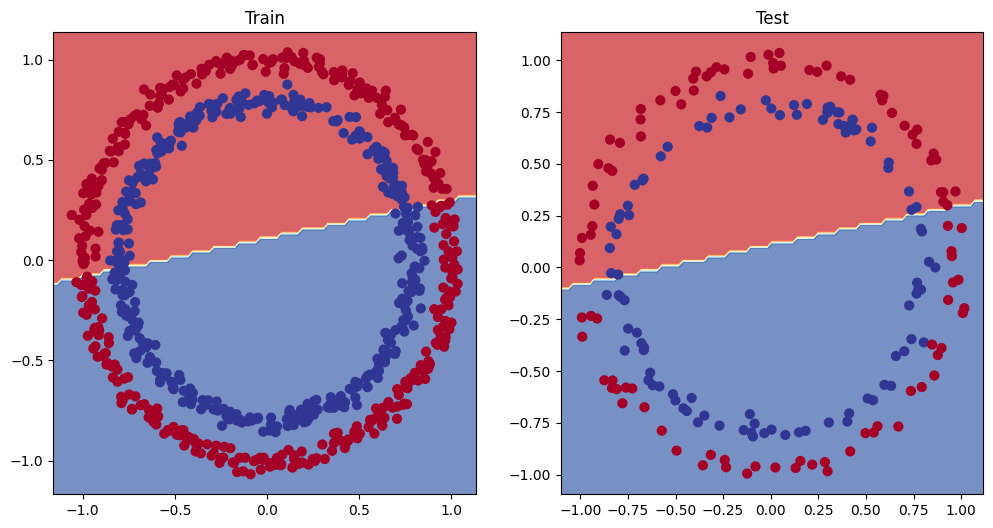

In [240]:
# Plot decision boudary 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

we can see that the decision boundary is just 啊straight line, trying to split the data in the middle. 
that's what the accurency of our model is just 50% because all it's doing is just splitting the data...

And the reason why the decision boundary is a straigh line is because all we are doing in the hidden layers are `linear layers`... the linear layer is not capable of predicting pattern that is non linear.. In this case, the circles..





## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn more about the patterns in the data..
* Add more hidden units(neurons) -> go from 5 hidden units to 10 hidden units.( more features to chance)
* Fit for longer (epochs)
* Changing the activation functions (changing from linear to non-linear)
* Changing the learning rate 
    * exploding/vanishing gradient problem. 
* change the loss function 


Tool that help to improve through experimentation
`torch.utils.tensorboard`

These options are all from a model's perspective because they deal directly with the model, not the data..

In [241]:
"""
Let's try 
1. Add more hidden units 5->10
2. Add more hidden layers 2->3
3. Increase the number of epochs 100->1000
"""
from ast import mod


class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10) # increased hidden units(neurons) to 10
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        z = self.layer_1(x) # z is usually used to represent logits
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z
        # or just....
        # return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [242]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)



In [243]:
# Write a training and evauluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Building training and evaluation loop
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epochs in range(epochs):
    ### Training 
    model_1.train()
    #1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probabilities -> pred labels
    # Calculate the loss/accurancy, loss_fn is BCEWithLogitsLoss
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss Expect raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred) # accuracy function

    #3. Optimizer zero grad
    optimizer.zero_grad()
    #4. Loss Backward
    loss.backward()
    #5. Optimizer step
    optimizer.step() # gradient descent
    ## Testing 
    model_1.eval()
    with torch.inference_mode():
        #1. Forwar pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        #print out what's happening
        if epochs % 100 == 0:
            print(f"Epoch:{epochs} | Loss : {loss:.5f}, Acc:{acc:.2f}% | Test Loss: {test_loss:.5f} Test acc :{test_acc:.5f}")  

        


Epoch:0 | Loss : 0.69396, Acc:50.88% | Test Loss: 0.69261 Test acc :51.00000
Epoch:100 | Loss : 0.69305, Acc:50.38% | Test Loss: 0.69379 Test acc :48.00000
Epoch:200 | Loss : 0.69299, Acc:51.12% | Test Loss: 0.69437 Test acc :46.00000
Epoch:300 | Loss : 0.69298, Acc:51.62% | Test Loss: 0.69458 Test acc :45.00000
Epoch:400 | Loss : 0.69298, Acc:51.12% | Test Loss: 0.69465 Test acc :46.00000
Epoch:500 | Loss : 0.69298, Acc:51.00% | Test Loss: 0.69467 Test acc :46.00000
Epoch:600 | Loss : 0.69298, Acc:51.00% | Test Loss: 0.69468 Test acc :46.00000
Epoch:700 | Loss : 0.69298, Acc:51.00% | Test Loss: 0.69468 Test acc :46.00000
Epoch:800 | Loss : 0.69298, Acc:51.00% | Test Loss: 0.69468 Test acc :46.00000
Epoch:900 | Loss : 0.69298, Acc:51.00% | Test Loss: 0.69468 Test acc :46.00000


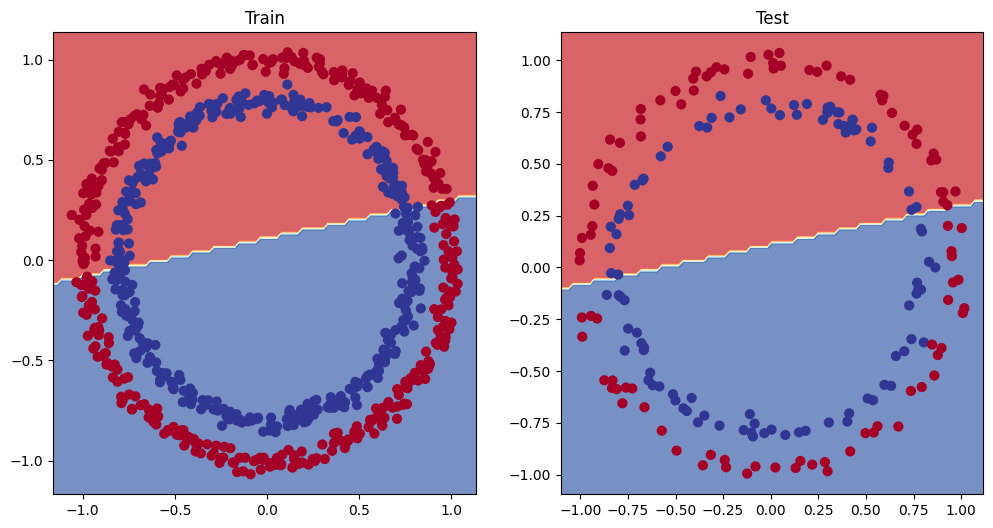

In [244]:
# plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 


we can the model is still trying to draw the straight line to learn the model's behavior...

again, the linear layers are not helping..

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem..
To verify that our model essentially "works", we try to fit it to a smaller data set and see if this models actually learns. 

Then by adding complexity each time to solve a bigger problem. 

In [245]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1) # unsqueeze to add an extra dimension
y_regression = weight * X_regression + bias

#Check the data 
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [246]:
# Create train and test splits

train_split = int(0.8 * len(X_regression))
X_reg_train, y_reg_train = X_regression[:train_split], y_regression[:train_split]
X_reg_test, y_reg_test = X_regression[train_split:], y_regression[train_split:]

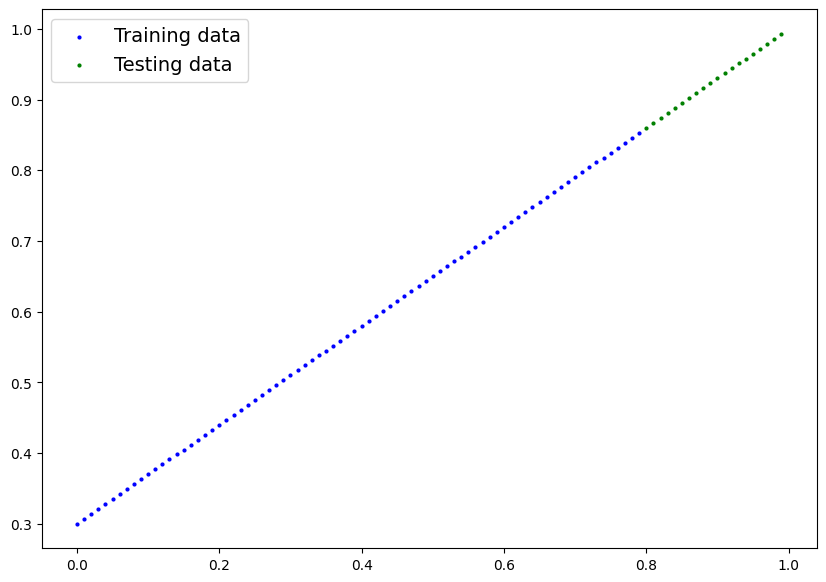

In [247]:
import test


plot_predictions(train_data = X_reg_train, train_labels=y_reg_train,test_data=X_reg_test, test_labels=y_reg_test)


In [248]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting  `model_1` to fit a straight line

model_1 has two input features, therefore it needs to reduce to 1. 

In [249]:
#Same architecture as model_1 

# Sequential also trigers the internal forward method. 
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10), 
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [250]:
# loss function and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

# Training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

# Put the data on the target device
X_train_reg,y_train_reg = X_reg_train.to(device),y_reg_train.to(device)
X_test_reg,y_test_reg = X_reg_test.to(device),y_reg_test.to(device)


for epoch in range(epochs):
    ### Training 
    model_2.train()
    #1. Forward pass
    y_pred = model_2(X_reg_train)
    # Calculate the loss
    loss = loss_fn(y_pred, y_reg_train)
    #3. Optimizer zero grad
    optimizer.zero_grad()
    #4. Loss Backward
    loss.backward()
    #5. Optimizer step
    optimizer.step() # gradient descent

    ## Testing 
    model_2.eval()
    with torch.inference_mode():
        #1. Forwar pass
        test_pred = model_2(X_reg_test)
        #2. calculate the test loss
        test_loss = loss_fn(test_pred,y_reg_test)
        #print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch:{epoch} | Loss : {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch:0 | Loss : 0.75986 | Test Loss: 0.91103
Epoch:100 | Loss : 0.02858 | Test Loss: 0.00081
Epoch:200 | Loss : 0.02533 | Test Loss: 0.00209
Epoch:300 | Loss : 0.02137 | Test Loss: 0.00305
Epoch:400 | Loss : 0.01964 | Test Loss: 0.00341
Epoch:500 | Loss : 0.01940 | Test Loss: 0.00387
Epoch:600 | Loss : 0.01903 | Test Loss: 0.00379
Epoch:700 | Loss : 0.01878 | Test Loss: 0.00381
Epoch:800 | Loss : 0.01840 | Test Loss: 0.00329
Epoch:900 | Loss : 0.01798 | Test Loss: 0.00360
Epoch:1000 | Loss : 0.01782 | Test Loss: 0.00333
Epoch:1100 | Loss : 0.01674 | Test Loss: 0.00317
Epoch:1200 | Loss : 0.01640 | Test Loss: 0.00316
Epoch:1300 | Loss : 0.01648 | Test Loss: 0.00256
Epoch:1400 | Loss : 0.01648 | Test Loss: 0.00323
Epoch:1500 | Loss : 0.01632 | Test Loss: 0.00337
Epoch:1600 | Loss : 0.01597 | Test Loss: 0.00284
Epoch:1700 | Loss : 0.01458 | Test Loss: 0.00244
Epoch:1800 | Loss : 0.01532 | Test Loss: 0.00275
Epoch:1900 | Loss : 0.01406 | Test Loss: 0.00288
Epoch:2000 | Loss : 0.01460 | Te

that was pretty good! The test loss is very minimum.. 
so the model we developed actually works, but just not to our data set..

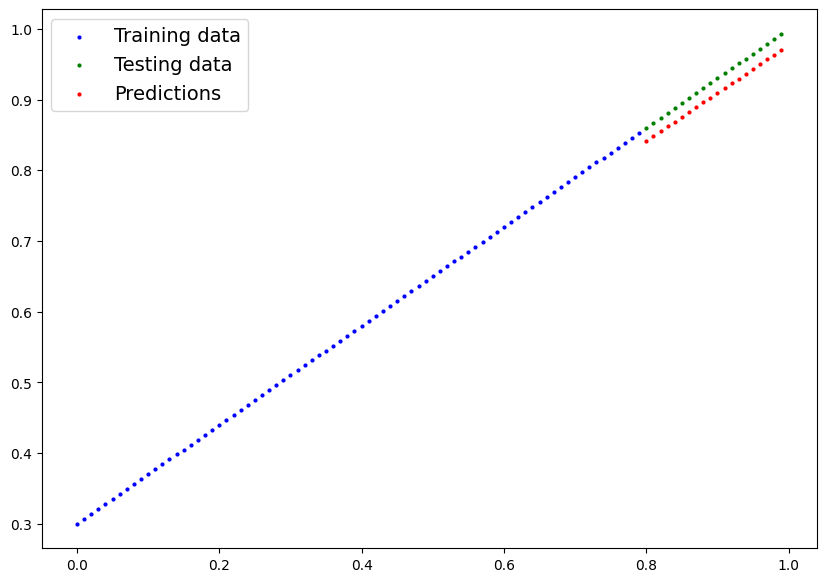

In [251]:
# turn on evaluation mode

model_2.eval()

# Make predictions
with torch.inference_mode():
    y_preds = model_2(X_reg_test)

plot_predictions(train_data=X_reg_train, train_labels=y_reg_train, test_data=X_reg_test, test_labels=y_reg_test, predictions=y_preds)

clearly, our model is working, but for the circle data sets.. linear layer just doesn't give the capability to estimate curved lines... 

## 6. The missing piece : non-linearity

“What patterns could you draw if you were given an infinite amount of straight and non-straight lines? "

or in ML terms, an infinite(but really finite) of linear and non-linear functions? 


### 6.1 Recreating non-linear data(red and blue circles)

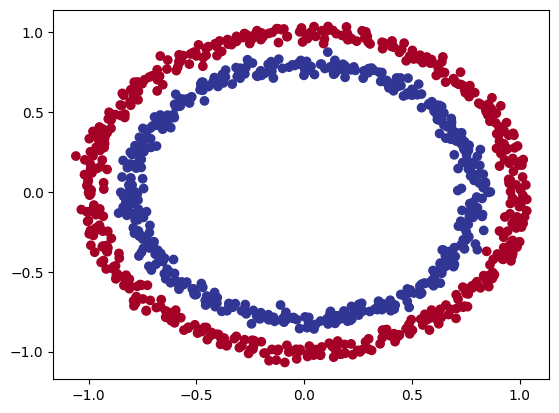

In [252]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

plt.scatter(x= X[:,0],y = X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [253]:
# Convert data to tensors and then to test splits and train

import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

### 6.2 Building a model with non-linearity 



- Linear = straight line
- non-linear = not straight 

Artificial Neural networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data. 

In [254]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # on every element, if the input is negative, make it zero, leave positive values unchanged.
        
    def forward(self, x):
        # where should we put our non-linear activation function?
        z = self.layer_1(x)
        z = self.relu(z)
        z = self.layer_2(z)
        z = self.relu(z)
        z = self.layer_3(z)
        # Relu is put inbetween layers to introduce non-linearity
        return z
        # or just....
        # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

Epoch:0 | Loss : 0.69295, Acc:50.00% | Test Loss: 0.69319 Test acc :50.00000
Epoch:100 | Loss : 0.69115, Acc:52.88% | Test Loss: 0.69102 Test acc :52.50000
Epoch:200 | Loss : 0.68977, Acc:53.37% | Test Loss: 0.68940 Test acc :55.00000
Epoch:300 | Loss : 0.68795, Acc:53.00% | Test Loss: 0.68723 Test acc :56.00000
Epoch:400 | Loss : 0.68517, Acc:52.75% | Test Loss: 0.68411 Test acc :56.50000
Epoch:500 | Loss : 0.68102, Acc:52.75% | Test Loss: 0.67941 Test acc :56.50000
Epoch:600 | Loss : 0.67515, Acc:54.50% | Test Loss: 0.67285 Test acc :56.00000
Epoch:700 | Loss : 0.66659, Acc:58.38% | Test Loss: 0.66322 Test acc :59.00000
Epoch:800 | Loss : 0.65160, Acc:64.00% | Test Loss: 0.64757 Test acc :67.50000
Epoch:900 | Loss : 0.62362, Acc:74.00% | Test Loss: 0.62145 Test acc :79.00000


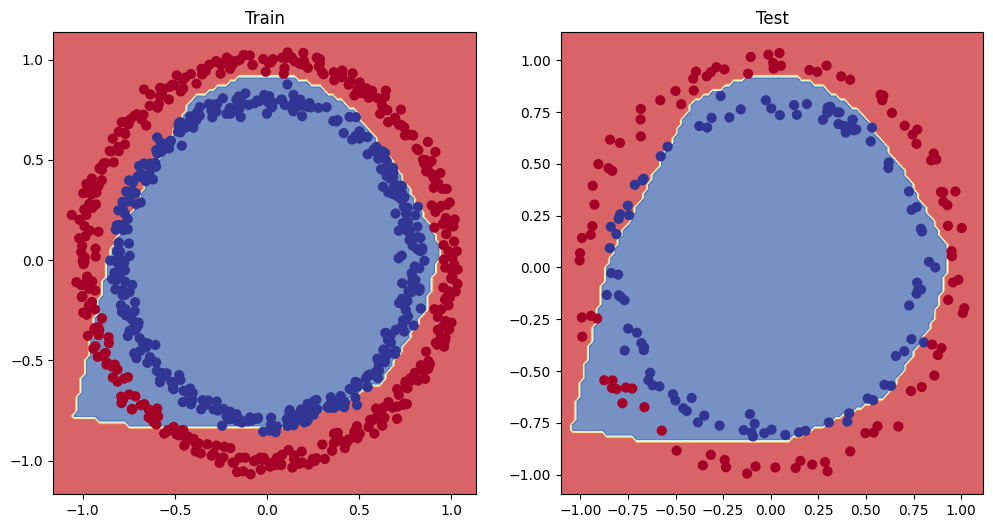

In [255]:



loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)


torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# Loop through data
epochs = 1000
for epoch in range(epochs):
    ### Training 
    model_3.train() # don't forget this
    #1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probabilities -> pred labels
    # Calculate the loss/accurancy, loss_fn is BCEWithLogitsLoss
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss Expect raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred) # accuracy function
    #3. Optimizer zero grad
    optimizer.zero_grad()
    #4. Loss Backward
    loss.backward()
    #5. Optimizer step
    optimizer.step() # gradient descent 
    ## Testing
    model_3.eval()
    with torch.inference_mode():   
        #1. Forwar pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        #print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch:{epoch} | Loss : {loss:.5f}, Acc:{acc:.2f}% | Test Loss: {test_loss:.5f} Test acc :{test_acc:.5f}")
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)  
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


### 6.4 Evaluating a model trained with non-linear activation functions


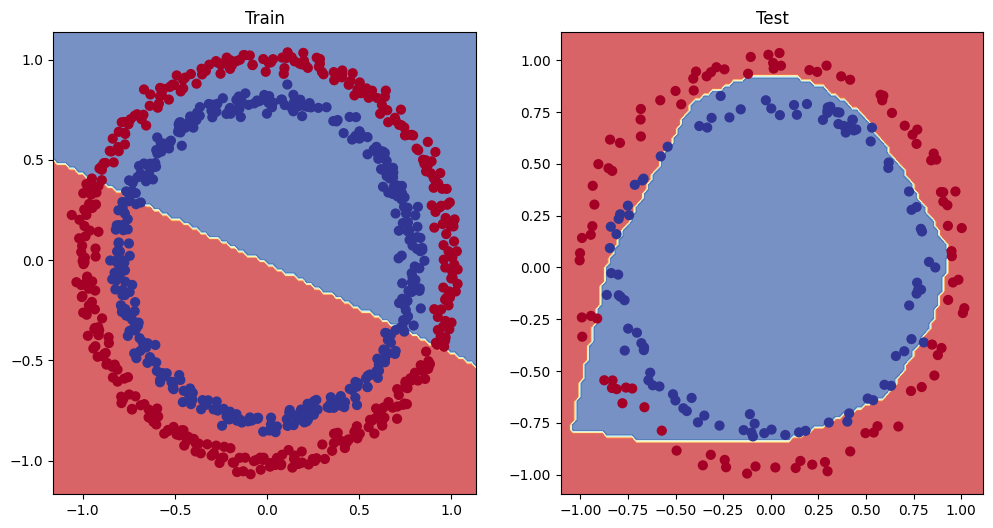

In [256]:
from pyexpat import model


model_3.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model_3(X_test.to(device)))).squeeze()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # non-linearity
plt.subplot(1,2,2) 
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

**chanllenges** how do you improve model_3 ?

## 7. Replicating non-linear activation functions （relu/Sigmoid)

Neural networks, rather than us telling the model what to learn, we give it the tools to discover  patterns in data and it tries to figure out the patterns on its own. 

And these tools are linear & non-linear functions(layers)

In [257]:
# Create a tensor 

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

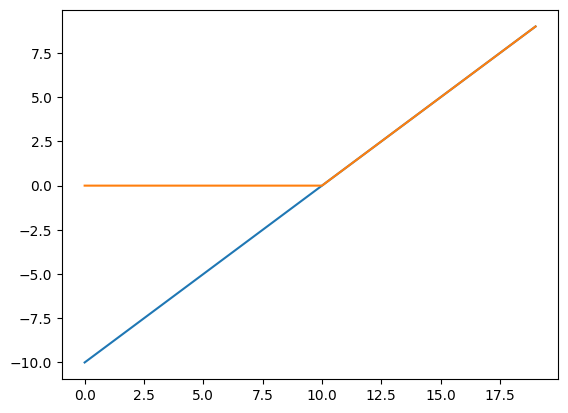

In [258]:
# Visualize this data 
import matplotlib.pyplot as plt
plt.plot(A)

plt.plot(torch.relu(A))


In [259]:
# replicate RELU function

def relu(x: torch.Tensor) -> torch.Tensor:
    """Replicates the ReLU activation function."""
    return torch.maximum(torch.tensor(0), x)




tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

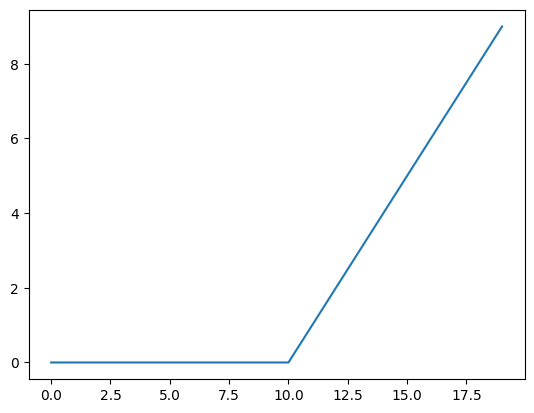

In [260]:
plt.plot(relu(A))

relu(A) == torch.relu(A)

In [261]:
# replicate Sigmoid function

def sigmoid(x: torch.Tensor) -> torch.Tensor:
    """Replicates the Sigmoid activation function."""
    return 1 / (1 + torch.exp(-x))

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

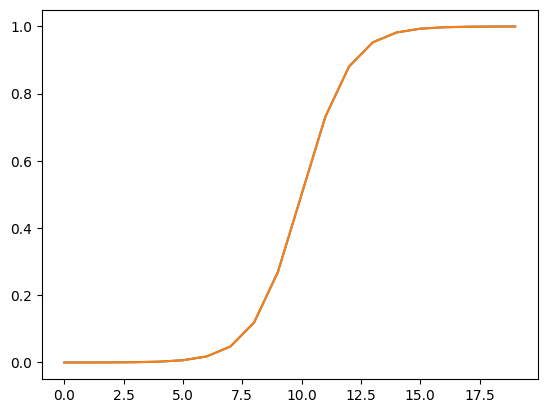

In [262]:
plt.plot(torch.sigmoid(A))

plt.plot(sigmoid(A))

sigmoid(A) == torch.sigmoid(A)

## 8. Putting all together with a multi-class classification

* Binary Classificaton -> one thing or another 
* Multi-Class Classification -> more than one thing..

differences:
- Softmax instead of Sigmoid
- CrossEntropyLoss instead of BCELoss

### 8.1 Creating a toy  multi-class dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


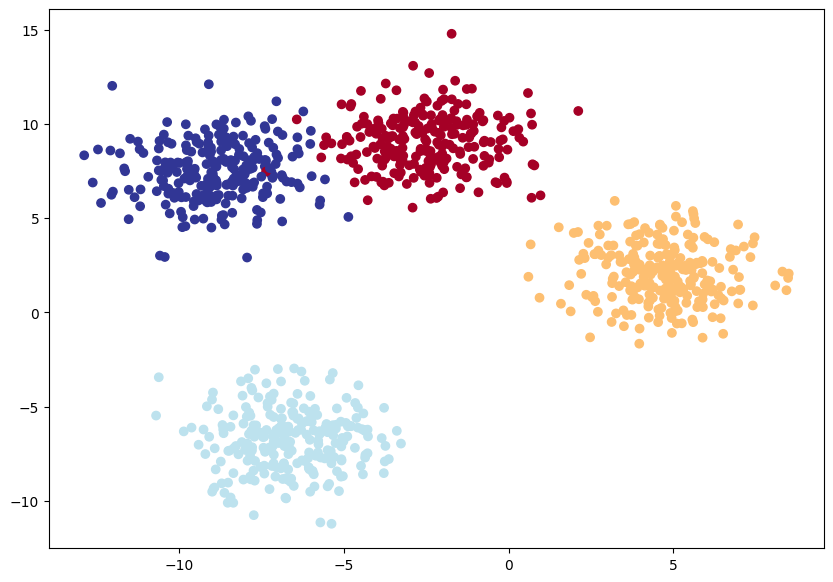

In [280]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [281]:
# Create device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [282]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss fuction and an optimizer function for multi-class model

In [ ]:
loss_fn = nn.CrossEntropyLoss() # for multi-class classification 
# if we are treaating unbalanced classes of data set to be trained, we can pass in weight parameter. 

# Lost function can be refer to criterion or cost function

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

https://www.bilibili.com/video/BV1RCyKBpE4z?t=197.7

### 8.4 Getting prediction probabilities for a multi-class pythorch model

Before training the model, let's take a look at what the raw output(logit) if you pass the X_train to the model

In order to evaluate and train and test our model, we need to convert our model outputs(logits) to predicitons probabilities, then to prediction labels(1,2,3,4) 

Logits -> pred probs -> pred labels.

In [283]:
# Let's just do 1 forward pass to see what the logits look like
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_train.to(device))

y_logits[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]])

In [284]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

we can see the y_preds is nothying like the y_blob_test... remember those are tahe logits.. it represents something, but without using a function(activation), we don't not what they mean..

Next step is to convert our model's logit output to prediction probabilities

In [285]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])
torch.sum(y_pred_probs[0]) # We can see that the sum of all probabilities for a single sample is 1.

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]])
tensor([[0.1838, 0.3422, 0.1500, 0.3239],
        [0.2199, 0.0377, 0.1839, 0.5586],
        [0.3406, 0.0482, 0.5326, 0.0785],
        [0.3405, 0.0657, 0.4446, 0.1492],
        [0.2527, 0.0424, 0.2283, 0.4766]])


tensor(1.)

if we look at y_pred_probs, we can say that "this is how much likely that the predicted output of its class

In [286]:

# Let's try to cooe softmax ourselves
def softmax(x: torch.Tensor, dim: int = -1) -> torch.Tensor:
    """Replicates the Softmax activation function."""
    exp_x = torch.exp(x)
    sum_exp_x = torch.sum(exp_x, dim=dim, keepdim=True)
    return exp_x / sum_exp_x




> SoftMax: a function that converts input values to 0–1 values that sum up to 1.
https://medium.com/@sue_nlp/what-is-the-softmax-function-used-in-deep-learning-illustrated-in-an-easy-to-understand-way-8b937fe13d49

There is one final step to do.. convert prediction probabilities to prediction labels

In [287]:
y_preds = torch.argmax(y_pred_probs, dim=1) #argmax to get the index of the highest probability

In [288]:
y_preds

tensor([1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 1, 3, 2, 2, 2, 1, 3, 2,
        3, 3, 1, 1, 2, 3, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 3, 3, 3, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 3, 2, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2,
        3, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 2,
        3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
        2, 2, 2, 3, 3, 1, 1, 3, 1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
        3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 2,
        2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3,
        2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 3,

perfect! now we have the same model type! now we are ready to train out model. 

### 8.5 Creating a training loop and test loop for a multi-class model

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # print(y_logits)
    # 2. Calculate loss and accuracy
    print(y_logits.shape, y_blob_train.shape) 
    loss = loss_fn(y_logits, y_blob_train)
    
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

torch.Size([800, 4]) torch.Size([800])


ValueError: Target size (torch.Size([800])) must be the same as input size (torch.Size([800, 4]))